# Validation Part B Responses

1. 
    1. The best possible score from an $R^2$ model is 1, indicating the model perfectly models the data. With real world data, getting such a value is almost impossible (unless your dataset has only 2 points).
    1. Simply returning the average as the model prediction would yield an $R^2$ value of 0.
    1. It is possible to get arbitrarily low negative scores by simply making the model more and more incorrrect with its predictions.
1. 
   1. The best possible accuracy a model can get is 100%, indicating all items were properly classified.
   1. If you had a model that only predicted class A, then in a dataset with $X\%$ items of type class A, the model would still get an accuracy of $X\%$. In the specific case of the question, the model would get an 85% accuracy; this is obviously undesireable, as the model clearly is not doing anything to actually classify data.
   1. On any data set, it is always possible to get an accuracy of 0% by perfectly mislabeling every item (which is impresive in its own right). In fact, in the case of two classes at least, an accuracy of 0% might as well be an accuracy of 100%, since you can just flip your model's classification. As such, a score of 50% (i.e. truly random) could be considered to be worse.
1. A recall score of 0 for class A indicates that there were no true positives for class A. Thus, the model never classifies an item from class A as belonging to class A; instead the model will always return either class B or C (though we can't know more than that).
1. A precision score of 1 for class A indicates that there were no false positives for class A. However, this tells us nothing about the true positives for class A, so knowing the precision score alone tells us nothing about what the model would do for something actually belonging to class A.
1. Just from knowing the AUC is 1, we cannot actually say anything about what the model's probabilty output would be. We do know the model would predict the item belongs to class A, however we cannot say with what probability it would do so. Indeed, in the case of AUC, all we really know from this is that the model will always assign a higher probability of belonging to class A to items actually from class A than from class B.
1. As above, just from knowing the AUC is 0, we cannot actually say anything about what the model's probabilty output would be. We do know the model would predict the item belongs to class B, however we cannot say with what probability it would do so. Indeed, in the case of AUC, all we really know from this is that the model will never assign a higher probability of belonging to class A to items actually from class A than from class B.

### Further Stuff on 5/6

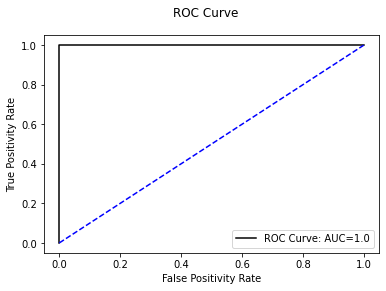

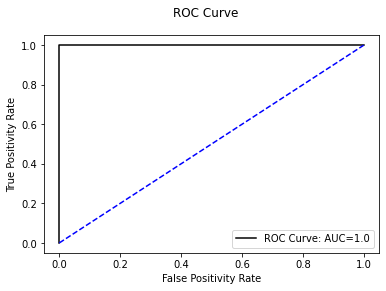

In [32]:
import matplotlib.pyplot
import numpy

classes=[0]*50+[1]*50

class model_random:
    def predict_proba(a):
        r=numpy.random.uniform(0,0.49)
        if a==[0]:
            return([[1-r,r]])
        else:
            return([[r,1-r]])
        
class model_51:
    def predict_proba(a):
        r=numpy.random.uniform(0,0.49)
        if a==[0]:
            return([[0.51,0.49]])
        else:
            return([[0.49,0.51]])

def ROC_plot_point(prob, model, Inputs):
    predictions=[[int(i>=prob) for i in model.predict_proba([inputs])[0]] for inputs in Inputs]
    
    true_positives=sum([prediction[truth]==1 for prediction, truth in zip(predictions, classes)])
    true_negatives=sum([prediction[1-truth]==0 for prediction, truth in zip(predictions, classes)])
    
    false_positives=sum([prediction[1-truth]==1 for prediction, truth in zip(predictions, classes)])
    false_negatives=sum([prediction[truth]==0 for prediction, truth in zip(predictions, classes)])
    
    recall=true_positives/(true_positives+false_negatives)
    fp_rate=false_positives/(false_positives+true_negatives)
    
    return([fp_rate,recall])
    
    
def ROC_plot(model, Inputs):
    fig = matplotlib.pyplot.figure()
    fig.suptitle('ROC Curve')
    matplotlib.pyplot.xlabel('False Positivity Rate')
    matplotlib.pyplot.ylabel('True Positivity Rate')
    
    X=numpy.linspace(0,1, 200)
    points=numpy.array([ROC_plot_point(prob,model, Inputs) for prob in X])
    
    AUC=-round(numpy.trapz(points[:,1], points[:,0]),3)
    
    matplotlib.pyplot.plot(points[:,0], points[:,1], c='black', label=f'ROC Curve: AUC={AUC}')
    matplotlib.pyplot.plot(X, X, c='b', linestyle='dashed')
    
    matplotlib.pyplot.legend()
    
    """
    predictions=numpy.array(model.predict_proba(test_inputs))
    fpr, tpr, _=roc_curve(classes, predictions[:,0])
    auc=auc(fpr,tpr)
    matplotlib.pyplot.plot(tpr, fpr)
    
        Commented out right here is the code included in sklearn.metrics to plot an ROC curve. Unfortunetly, I only
    realized this existed after figuring out how to do it myself.
    """
    
    matplotlib.pyplot.show()
    

ROC_plot(model_random, classes)

ROC_plot(model_51, classes)

The above code is just supposed to be some illustrative (and rather dumb) examples of how a model can get an AUC of 1 even if it isn't fully confident in its responses. In the case of `model_random`, it always assign a random probability between 0 and 49% to the incorrect class, and thus always assigns a higher probability to the correct class. As such, it gets an AUC of 1. `model_51` takes this a bit further, by always assigning a 51% probability to the correct class. Despite not being very confident in its response, it still gets an AUC of 1 since it always assigns a higher probability to the correct class.

I can explain why this works in the case of `model_51`. For all the probability thresholds less than 49%, the recall and FP rate are both 1. For probability thresholds $0.49< p\leq 0.51$, the scores are 1 and 0 respectively. Finally, for probabilty thresholds greater than 51%, the model scores a 0 in both. As such, the ROC curve just goes from (1,1) to (0,1) and then to (0,0), thereby producing a curve with area 1.

The case of `model_random` is more complicated, but seems to work in a similar way. Namely, the plot starts at (1,1), then seems to have the recall fixed at 1 while the FP rate goes to 0, after which the FP rate is fixed at 0 while the recall goes from 1 to 0. As such, we again get a curve with area 1.

The case of an AUC of 0 is basically the same.

I might be missing something here, so I would greatly appreciate any help if I am!